In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"



In [4]:
import os
import pandas as pd

In [5]:
data_path=r"C:\Users\rajud\Documents\iNTERVIEWS\Sigmoid\case study-2024\case study-2024\train (6).csv"
label_path=r"C:\Users\rajud\Documents\iNTERVIEWS\Sigmoid\case study-2024\case study-2024\train_churn_labels.csv"

In [6]:
data=pd.read_csv(data_path)
data[:2]
display(data.describe())
data.describe().to_csv("summary_features.csv")

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [7]:
labels=pd.read_csv(label_path)
display(labels[:2])
display(labels["Label"].unique())
display(labels["Label"].value_counts())




,Label
0,-1
1,1


array([-1,  1], dtype=int64)

-1    46328
 1     3672
Name: Label, dtype: int64

In [8]:
# Calculate % of missing values in each column
na_percent = data.isna().mean() * 100

# Filter columns with >40% missing values
cols_over_40_na = na_percent[na_percent <30].index.tolist()

print("Columns with more than 30% missing values:")
print(cols_over_40_na)
print("\nLen of Columns with more than 30% missing values:")

print(len(cols_over_40_na))

# Also print the percentage for clarity
na_percent[na_percent <30]


Columns with more than 30% missing values:
['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227', 'Var228']

Len of Columns with more than 30% missing values:
67


Var6      11.058
Var7      11.078
Var13     11.078
Var21     11.058
Var22     10.018
           ...  
Var222     0.000
Var223    10.422
Var226     0.000
Var227     0.000
Var228     0.000
Length: 67, dtype: float64

In [9]:
#Not using cols with missing value % mo
data_filtered_missing=data[cols_over_40_na]

In [10]:
# Separate categorical and numerical features by dtype
cat_features = data_filtered_missing.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = data_filtered_missing.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", cat_features)
print("Numerical:", num_features)


Categorical: ['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227', 'Var228']
Numerical: ['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181']


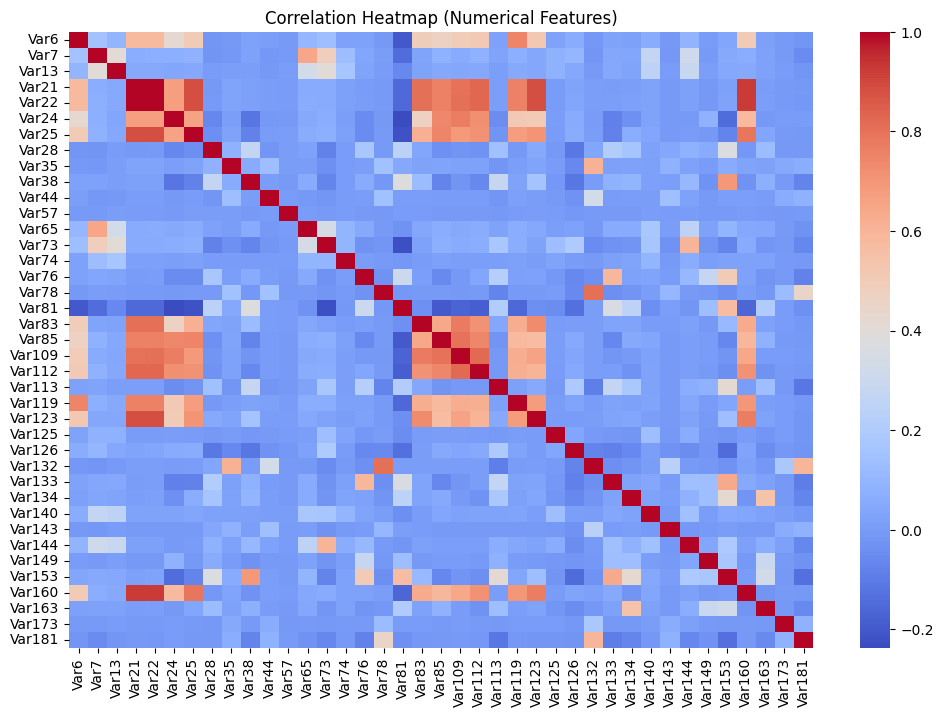

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix on numerical features only
corr_matrix = data_filtered_missing[num_features].corr(method='pearson')  # or 'spearman' if non-normal
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [12]:
import numpy as np

threshold = 0.79  # adjust to 0.70 (loose) or 0.90 (strict)

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated pairs
high_corr_pairs = [
    (row, column, upper.loc[row, column])
    for row in upper.index
    for column in upper.columns
    if abs(upper.loc[row, column]) > threshold
]

print("\nHighly Correlated Feature Pairs (=>|0.79|):")
for f1, f2, corr in high_corr_pairs:
    print(f"{f1}  <-->  {f2}   |  Corr = {corr:.2f}")

# Choose one from each pair to drop
to_drop = {f2 for _, f2, _ in high_corr_pairs}
print("\nSuggested Features to Drop:")
print(to_drop)
to_drop_num=list(to_drop)


Highly Correlated Feature Pairs (=>|0.79|):
Var21  <-->  Var22   |  Corr = 1.00
Var21  <-->  Var25   |  Corr = 0.89
Var21  <-->  Var83   |  Corr = 0.80
Var21  <-->  Var109   |  Corr = 0.80
Var21  <-->  Var112   |  Corr = 0.83
Var21  <-->  Var123   |  Corr = 0.89
Var21  <-->  Var160   |  Corr = 0.93
Var22  <-->  Var25   |  Corr = 0.89
Var22  <-->  Var83   |  Corr = 0.80
Var22  <-->  Var109   |  Corr = 0.80
Var22  <-->  Var112   |  Corr = 0.83
Var22  <-->  Var123   |  Corr = 0.89
Var22  <-->  Var160   |  Corr = 0.93
Var25  <-->  Var160   |  Corr = 0.79
Var78  <-->  Var132   |  Corr = 0.81
Var85  <-->  Var109   |  Corr = 0.80
Var109  <-->  Var112   |  Corr = 0.82

Suggested Features to Drop:
{'Var83', 'Var132', 'Var112', 'Var25', 'Var123', 'Var22', 'Var160', 'Var109'}


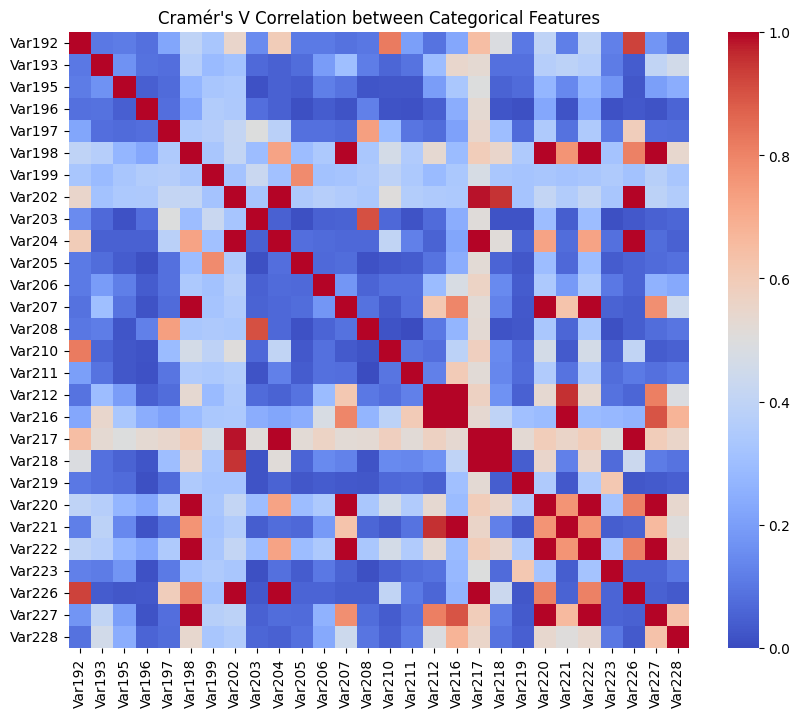

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(cm):
    chi2 = chi2_contingency(cm)[0]
    n = cm.sum().sum()
    r, k = cm.shape
    # Apply Cramér’s V formula but avoid division by zero
    if min(r, k) - 1 == 0:
        return 0.0
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér’s V correlation matrix
cat_corr = pd.DataFrame(np.zeros((len(cat_features), len(cat_features))),
                        index=cat_features, columns=cat_features)

for col1 in cat_features:
    for col2 in cat_features:
        if col1 == col2:
            cat_corr.loc[col1, col2] = 1.0
        else:
            cm = pd.crosstab(data_filtered_missing[col1], data_filtered_missing[col2])

            # Skip invalid matrix shapes like 1x1 or empty tables
            if cm.shape[0] > 1 and cm.shape[1] > 1:
                cat_corr.loc[col1, col2] = cramers_v(cm)
            else:
                cat_corr.loc[col1, col2] = 0.0

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation between Categorical Features")
plt.show()


In [14]:
# --- Find highly correlated categorical feature pairs ---
threshold = 0.7  # you can tune this to 0.6 or 0.8 based on strictness

high_corr_cat_pairs = []

# Select upper triangle (to avoid duplicate pairs)
upper = cat_corr.where(np.triu(np.ones(cat_corr.shape), k=1).astype(bool))

for row in upper.index:
    for col in upper.columns:
        if abs(upper.loc[row, col]) > threshold:
            high_corr_cat_pairs.append((row, col, upper.loc[row, col]))

print("\nHighly Correlated Categorical Feature Pairs (Cramér's V > 0.7):")
for f1, f2, score in high_corr_cat_pairs:
    print(f"{f1} ↔ {f2}  |  V = {score:.2f}")





Highly Correlated Categorical Feature Pairs (Cramér's V > 0.7):
Var192 ↔ Var210  |  V = 0.82
Var192 ↔ Var226  |  V = 0.93
Var197 ↔ Var208  |  V = 0.74
Var198 ↔ Var204  |  V = 0.72
Var198 ↔ Var207  |  V = 1.00
Var198 ↔ Var220  |  V = 1.00
Var198 ↔ Var221  |  V = 0.76
Var198 ↔ Var222  |  V = 1.00
Var198 ↔ Var226  |  V = 0.81
Var198 ↔ Var227  |  V = 1.00
Var199 ↔ Var205  |  V = 0.78
Var202 ↔ Var204  |  V = 1.00
Var202 ↔ Var217  |  V = 0.98
Var202 ↔ Var218  |  V = 0.95
Var202 ↔ Var226  |  V = 1.00
Var203 ↔ Var208  |  V = 0.90
Var204 ↔ Var217  |  V = 1.00
Var204 ↔ Var220  |  V = 0.72
Var204 ↔ Var222  |  V = 0.72
Var204 ↔ Var226  |  V = 1.00
Var207 ↔ Var216  |  V = 0.80
Var207 ↔ Var220  |  V = 1.00
Var207 ↔ Var222  |  V = 1.00
Var207 ↔ Var227  |  V = 0.77
Var212 ↔ Var216  |  V = 1.00
Var212 ↔ Var221  |  V = 0.96
Var212 ↔ Var227  |  V = 0.81
Var216 ↔ Var221  |  V = 1.00
Var216 ↔ Var227  |  V = 0.90
Var217 ↔ Var218  |  V = 1.00
Var217 ↔ Var226  |  V = 1.00
Var220 ↔ Var221  |  V = 0.76
Var220 

In [15]:
# Choose one from each pair to drop (typically second feature)
to_drop_cat = {f2 for _, f2, _ in high_corr_cat_pairs}

print("\nSuggested Categorical Features to Drop:")
print(to_drop_cat)
print("\nSuggested Numerical Features to Drop:")
print(to_drop_num)

# Combine features to drop
features_to_drop = list(to_drop_cat) + list(to_drop_num)

# Drop from dataset
data_reduced = data_filtered_missing.drop(columns=features_to_drop)




Suggested Categorical Features to Drop:
{'Var207', 'Var227', 'Var208', 'Var205', 'Var218', 'Var220', 'Var217', 'Var210', 'Var216', 'Var204', 'Var221', 'Var226', 'Var222'}

Suggested Numerical Features to Drop:
['Var83', 'Var132', 'Var112', 'Var25', 'Var123', 'Var22', 'Var160', 'Var109']


In [16]:
data_reduced

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,...,Var198,Var199,Var202,Var203,Var206,Var211,Var212,Var219,Var223,Var228
0,1526.0,7.0,184.0,464.0,14.0,166.56,0.0,3570.0,0.0,4.076907,...,ka_ns41,nQUveAzAF7,dXGu,9_Y1,haYg,L84s,XfqtO3UdzaXh_,FzaX,jySVZNlOJy,F2FyR07IdsN7I
1,525.0,0.0,0.0,168.0,2.0,353.52,0.0,4764966.0,0.0,5.408032,...,qEdASpP,y2LIM01bE1,lg1t,9_Y1,zm5i,L84s,NhsEn4L,FzaX,LM8l689qOp,F2FyR07IdsN7I
2,5236.0,7.0,904.0,1212.0,26.0,220.08,0.0,5883894.0,0.0,6.599658,...,NldASpP,y4g9XoZ,4bTR,9_Y1,haYg,L84s,UbxQ8lZ,FzaX,jySVZNlOJy,ib5G6X1eUxUn6
3,NaN,0.0,0.0,NaN,NaN,22.08,0.0,0.0,0.0,1.988250,...,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,NaN,Mtgm,NhsEn4L,FzaX,LM8l689qOp,F2FyR07IdsN7I
4,1029.0,7.0,3216.0,64.0,4.0,200.00,0.0,0.0,0.0,4.552446,...,EKR938I,ThrHXVS,xklU,9_Y1,6JmL,L84s,XfqtO3UdzaXh_,FzaX,LM8l689qOp,F2FyR07IdsN7I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.0,0.0,0.0,132.0,2.0,288.08,0.0,6042420.0,0.0,2.757958,...,7nPy3El,h3WsUQk,bIER,9_Y1,zm5i,L84s,NhsEn4L,FzaX,LM8l689qOp,F2FyR07IdsN7I
49996,1078.0,0.0,2736.0,380.0,2.0,166.56,0.0,0.0,0.0,0.594958,...,kJ1JA2C,7aPrx0x,P9KQ,9_Y1,sYC_,Mtgm,NhsEn4L,FzaX,LM8l689qOp,55YFVY9
49997,2807.0,7.0,1460.0,568.0,4.0,166.56,0.0,42210.0,0.0,6.574023,...,LK5nVRA,k10MzgT,TKnx,F3hy,kxE9,L84s,XfqtO3UdzaXh_,FzaX,LM8l689qOp,TCU50_Yjmm6GIBZ0lL_
49998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.562059,...,VcW4jEC,LH0kFz12FM,HJ88,9_Y1,NaN,Mtgm,NhsEn4L,FzaX,LM8l689qOp,F2FyR07IdsN7I


In [17]:
# Separate categorical and numerical features by dtype
cat_features_final = data_reduced.select_dtypes(include=['object', 'category']).columns.tolist()
num_features_final = data_reduced.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", cat_features_final)
print("Numerical:", num_features_final)

Categorical: ['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var202', 'Var203', 'Var206', 'Var211', 'Var212', 'Var219', 'Var223', 'Var228']
Numerical: ['Var6', 'Var7', 'Var13', 'Var21', 'Var24', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var85', 'Var113', 'Var119', 'Var125', 'Var126', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var163', 'Var173', 'Var181']


Fitting 3 folds for each of 15 candidates, totalling 45 fits

XGBoost Evaluation (Threshold=0.65):
Best XGB Params: {'subsample': 0.7, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9266
           1       0.20      0.24      0.22       734

    accuracy                           0.87     10000
   macro avg       0.57      0.58      0.57     10000
weighted avg       0.88      0.87      0.88     10000

ROC-AUC: 0.7048997212862823
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Random Forest Evaluation (Threshold=0.65):
Best RF Params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9266
           1       0.50      0.00      0.01       734

    accuracy  

c:\users\rajud\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,



CatBoost Evaluation (Threshold=0.65):
Best CatBoost Params: {'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 600, 'depth': 5}
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9266
           1       0.20      0.23      0.21       734

    accuracy                           0.88     10000
   macro avg       0.57      0.58      0.57     10000
weighted avg       0.88      0.88      0.88     10000

ROC-AUC: 0.7024428178139175


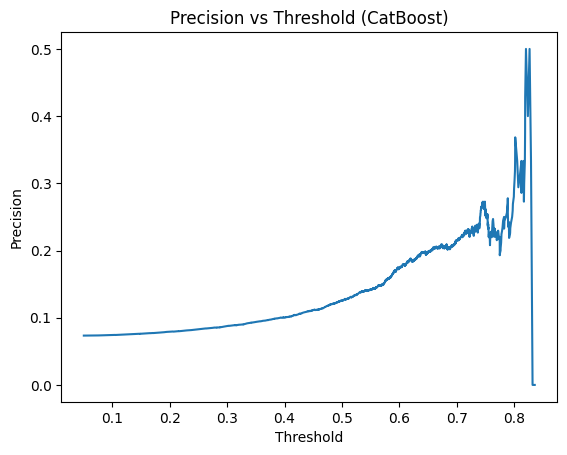

In [23]:
# ===============================
# Precision-Optimized Classification with Hyperparameter Tuning
# ===============================

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Assume data_reduced is your dataframe and 'Label' is the target
# -------------------------------
X = data_reduced.copy()
y = labels['Label'].copy()
y = y.replace(-1, 0)

# -------------------------------
# Identify numeric and categorical columns
# -------------------------------
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# -------------------------------
# Impute missing values
# -------------------------------
X[numeric_cols] = SimpleImputer(strategy='mean').fit_transform(X[numeric_cols])
X[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[categorical_cols])

# -------------------------------
# Label Encode categorical columns
# -------------------------------
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
threshold = 0.65  # Precision-optimized threshold

# =======================
# 1. XGBoost with Hyperparameter Tuning
# =======================
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=pos_weight
)

xgb_param_dist = {
    'n_estimators': [300, 500, 600],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 1, 2],
    'reg_lambda': [1, 2, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
y_pred_xgb = (y_proba_xgb > threshold).astype(int)

print("\nXGBoost Evaluation (Threshold={}):".format(threshold))
print("Best XGB Params:", xgb_search.best_params_)
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

# =======================
# 2. Random Forest with SMOTE + Hyperparameter Tuning
# =======================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train_res, y_train_res)
best_rf = rf_search.best_estimator_

y_proba_rf = best_rf.predict_proba(X_test)[:,1]
y_pred_rf = (y_proba_rf > threshold).astype(int)

print("\nRandom Forest Evaluation (Threshold={}):".format(threshold))
print("Best RF Params:", rf_search.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# =======================
# 3. CatBoost with Hyperparameter Tuning
# =======================
cat_model = CatBoostClassifier(
    loss_function='Logloss',
    random_seed=42,
    verbose=0,
    scale_pos_weight=pos_weight
)

cat_param_dist = {
    'iterations': [400, 600, 800],
    'depth': [4, 5, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 7]
}

cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
cat_search.fit(X_train, y_train)
best_cat = cat_search.best_estimator_

y_proba_cat = best_cat.predict_proba(X_test)[:,1]
y_pred_cat = (y_proba_cat > threshold).astype(int)

print("\nCatBoost Evaluation (Threshold={}):".format(threshold))
print("Best CatBoost Params:", cat_search.best_params_)
print(classification_report(y_test, y_pred_cat))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_cat))

# =======================
# Precision vs Threshold Plot (CatBoost)
# =======================
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_cat)
plt.plot(thresholds, precision[:-1])
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision vs Threshold (CatBoost)")
plt.show()
